In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [20]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset with ImageDataGenerator for augmentation
# data augmentation to make it variety : larger the dataset
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

# code data augmentation for training datasets
train_generator = datagen.flow_from_directory(
    'stega_dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)


Found 16000 images belonging to 6 classes.


In [22]:
# Check available classes
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)


Class names: ['clean', 'eth', 'html', 'js', 'ps', 'url']


In [23]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
    # rotation_range=10,
    # horizontal_flip=True
)
validation_generator = validation_datagen.flow_from_directory(
    'stega_dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 8000 images belonging to 6 classes.


In [24]:
test_datagen = ImageDataGenerator(
    rescale=1./255
    # rotation_range=10,
    # horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    'stega_dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 8000 images belonging to 6 classes.


In [25]:
# set the class name
class_names = list(train_generator.class_indices.keys())
class_names


['clean', 'eth', 'html', 'js', 'ps', 'url']

In [26]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])
# creating architectural layer for model


In [27]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [29]:
# 16010 train images divide by batch size (32) equal to steps per epoch

16010 / 32


500.3125

In [30]:
# 8000 validation images divide by batch size (32) equal to validation steps per epoch

8000 / 32


250.0

In [31]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        tf.keras.callbacks.ModelCheckpoint(
            'best_model.h5', monitor='val_loss', save_best_only=True)
    ]
)


Epoch 1/50
 17/500 [>.............................] - ETA: 23:11 - loss: 1.7879 - accuracy: 0.2040

KeyboardInterrupt: 

In [ ]:
scores = model.evaluate(test_generator)

 77/250 [========>.....................] - ETA: 5:45 - loss: 1.7736 - accuracy: 0.2606

KeyboardInterrupt: 

In [ ]:
scores

[1.7695106267929077, 0.25]

In [ ]:
history

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


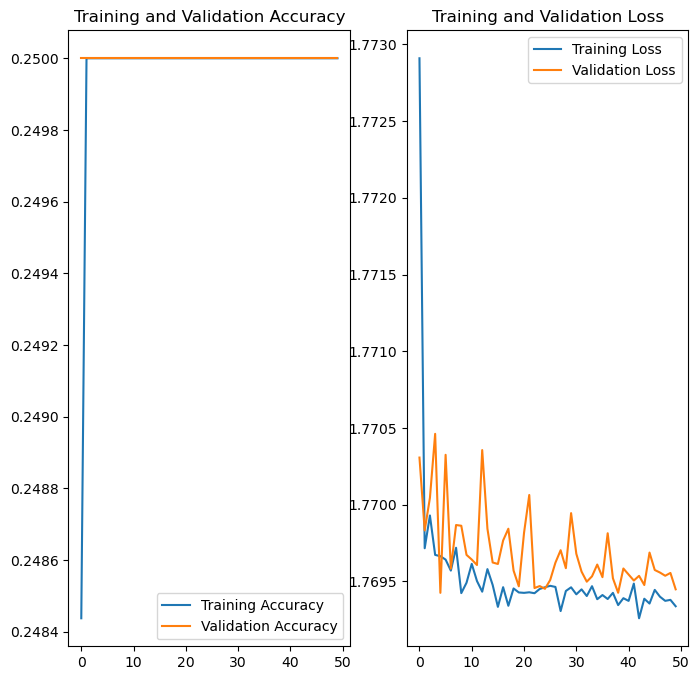

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: eth
1/1 [==============================] - 1s 618ms/step
predicted label: clean


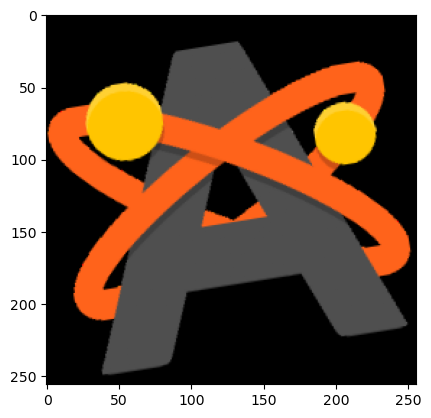

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

    break


1/1 [==============================] - 1s 550ms/step


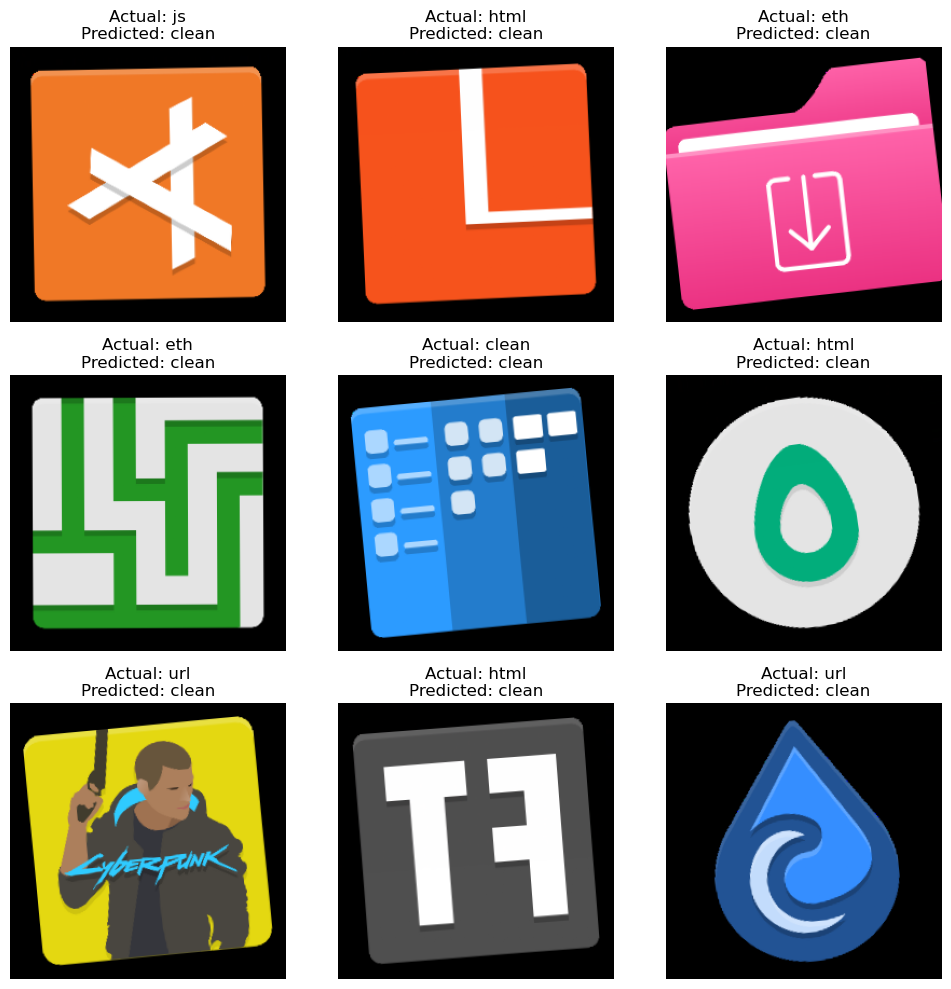

In [ ]:
import random

# Assuming test_generator is your data generator
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Get the total number of batches
num_batches = len(test_generator)

# Select a random batch index
random_batch_index = random.randint(0, num_batches - 1)

# Load the random batch
image_batch, label_batch = test_generator[random_batch_index]

# Predictions for the random batch
batch_predictions = model.predict(image_batch)

# Randomly select 9 images from the batch
random_indices = random.sample(range(len(image_batch)), 9)

for i, index in enumerate(random_indices):
    row = i // 3
    col = i % 3

    image = image_batch[index]
    label = int(label_batch[index])
    prediction = np.argmax(batch_predictions[index])

    axs[row, col].imshow(image)
    axs[row, col].set_title(
        f"Actual: {class_names[label]}\nPredicted: {class_names[prediction]}")
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
from datetime import datetime

# Keras & H5 format
# Create directories if they don't exist
keras_directory = "model/keras"
h5_directory = "model/h5"

os.makedirs(keras_directory, exist_ok=True)
os.makedirs(h5_directory, exist_ok=True)

now = datetime.now()
date_time_str = now.strftime("%Y-%m-%d_%H-%M-%S")

keras_file_name = os.path.join(keras_directory, f"stego_{date_time_str}.keras")
h5_file_name = os.path.join(h5_directory, f"stego_{date_time_str}.h5")

model.save(keras_file_name)
print("Model (keras) saved with file name:", keras_file_name)

model.save(h5_file_name)
print("Model (h5) saved with file name:", h5_file_name)

# Tflite format

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_folder = "model/tflite"
os.makedirs(tflite_folder, exist_ok=True)
tflite_file_name = os.path.join(tflite_folder, f"stego_{date_time_str}.tflite")
with open(tflite_file_name, "wb") as f:
    f.write(tflite_model)

print("Model (TensorFlow Lite) saved with file name:", tflite_file_name)


Model (keras) saved with file name: model/keras\stego_2024-06-01_11-59-29.keras
Model (h5) saved with file name: model/h5\stego_2024-06-01_11-59-29.h5


INFO:tensorflow:Assets written to: C:\Users\naimm\AppData\Local\Temp\tmpohdao1be\assets


INFO:tensorflow:Assets written to: C:\Users\naimm\AppData\Local\Temp\tmpohdao1be\assets


Model (TensorFlow Lite) saved with file name: model/tflite\stego_2024-06-01_11-59-29.tflite
